In [32]:

import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.ndimage.filters import convolve
%matplotlib inline


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras.utils import np_utils

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [25]:
import cv2
from PIL import Image

(480, 640)

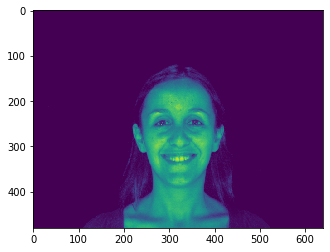

In [44]:
face1 = plt.imread("s001-01_img.tif")
#face2 = plt.imread("KA.FE1.45.tiff")

#plt.imshow(face1, cmap = "gray")
#type(plt.imshow(face2,cmap = "gray"))


(400, 400)

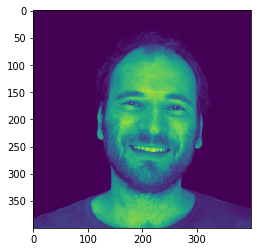

In [53]:
face3 = plt.imread("s005-01_img.tif")

gray = cv2.cvtColor(face3, cv2.COLOR_BGR2GRAY)

gray_bar = gray[:,80:560]

dim = (400,400)

resized = cv2.resize(gray_bar,dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)
np.shape(resized)

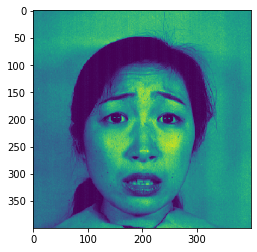

In [50]:
resized = cv2.resize(face2,dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)

In [55]:
plt.imsave('../data/img_1.tiff',resized, cmap = "gray")

## Processing all the images

In [68]:
df_1d = pd.read_csv('../data/image_list_1D.csv')
df_3d = pd.read_csv('../data/image_list_3D.csv')

df_1d.head()

,Name,Category
0,KM.HA1.4.tiff,HAPPY
1,KM.HA2.5.tiff,HAPPY
2,KM.HA3.6.tiff,HAPPY
3,KM.HA4.7.tiff,HAPPY
4,KM.SA1.9.tiff,SAD


In [71]:
#For 1D images only resizing is required

c = 1 
dim = (400,400)

for i in range(df_1d.shape[0]):
    
    img = plt.imread('../data/jaffedbase/'+df_1d['Name'][i])
    
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    plt.imsave('../data/All_processed/img_'+str(c)+'_'+df_1d['Category'][i]+'.tiff',resized, cmap = "gray")
    c=c+1



In [72]:
#For 3D images in first we need to convert to grayscale then resize the image

c2 = c 
dim = (400,400)

for i in range(df_3d.shape[0]):

    img = plt.imread('../data/facesdb/'+df_3d['Name'][i])
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    gray_bar = gray[:,80:560]
    
    resized = cv2.resize(gray_bar, dim, interpolation = cv2.INTER_AREA)
    
    plt.imsave('../data/All_processed/img_'+str(c2)+'_'+df_3d['Category'][i]+'.tiff',resized, cmap = "gray")
    c2=c2+1